In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import os
import sys
import pickle
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from plotly.offline import iplot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_the_file(path,training_file_name,test_file_name,num_train_samples):
    x_train = np.zeros((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, training_file_name + str(i))
        data, labels = _load_each_batch(fpath)
        x_train[(i - 1) * 10000: i * 10000, :, :, :] = data
        y_train[(i - 1) * 10000: i * 10000] = labels

    fpath = os.path.join(path, test_file_name)
    x_test, y_test = _load_each_batch(fpath)

    x_train = x_train.transpose(0, 2, 3, 1)
    x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)

def _load_each_batch(fpath, label_key='labels'):
    f = open(fpath, 'rb')
    if sys.version_info < (3,):
        d = pickle.load(f)
    else:
        d = pickle.load(f, encoding='bytes')
        # decode utf8
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode('utf8')] = v
        d = d_decoded
    f.close()
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

In [4]:
!wget -c "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
!gunzip -f "cifar-10-python.tar.gz"
!tar -xvf cifar-10-python.tar

--2022-12-07 04:32:41--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  13.0MB/s    in 14s     

2022-12-07 04:32:56 (11.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:
(X_train, y_train), (X_test, y_test) = load_the_file('/content/cifar-10-batches-py','data_batch_','test_batch',50000)

**Normalising the data**

In [6]:
X_train = X_train/255
X_test = X_test/255
X_train.shape, X_test.shape
# One-Hot-Encoding
Y_train_en = to_categorical(y_train,10)
Y_test_en = to_categorical(y_test,10)

**Building and training the Model by changing the variant**

In [7]:
# Model_1
model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(10,activation='softmax'))

model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()
history1 = model_1.fit(X_train, Y_train_en, validation_split=0.10, epochs = 20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [8]:
# Model_2 with change in hidden layer,filter,Kernel size and adding dropout
model_2 = Sequential()
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(10,activation='softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()
history2 = model_2.fit(X_train, Y_train_en, validation_split=0.10, epochs = 20, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       6272      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       262272    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3200)             

In [9]:
# Model_3 with learning rate and increase the number of epochs
model_3 = Sequential()
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Flatten())
model_3.add(Dense(256,activation='relu'))
optimizer = keras.optimizers.Adam(lr=0.0001)
model_3.add(Dense(10,activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model_3.summary()
history3 = model_3.fit(X_train, Y_train_en, validation_split=0.10, epochs = 30, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 128)       6272      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       262272    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0         
                                                                 
 flatten_2 (Flatten)         (None, 3200)             

**Final Results**

In [10]:
training_accuracy1 = history1.history['accuracy']
validation_accuracy1 = history1.history['val_accuracy']
training_accuracy2 = history2.history['accuracy']
validation_accuracy2 = history2.history['val_accuracy']
training_accuracy3 = history3.history['accuracy']
validation_accuracy3 = history3.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(training_accuracy1)), y=training_accuracy1,
                    name='Training accuracy in Model 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(validation_accuracy1)), y=validation_accuracy1,
                    name='Validation accuracy in Model 1', line = dict(color='firebrick')))
fig.add_trace(go.Scatter(x=np.arange(len(training_accuracy2)), y=training_accuracy2,
                    name='Training accuracy in Model 2', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(validation_accuracy2)), y=validation_accuracy2,
                    name='Validation accuracy in Model 2', line = dict(color='firebrick', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(training_accuracy3)), y=training_accuracy3,
                    name='Training accuracy in Model 3', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(validation_accuracy3)), y=validation_accuracy3,
                    name='Validation accuracy in Model 3', line = dict(color='firebrick', dash='dot')))
fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training Classification Accuracy vs Validation Classification Accuracy",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [11]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss in Model 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss in Model 1', line = dict(color='firebrick')))
fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss in Model 2', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss in Model 2', line = dict(color='firebrick', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss in Model 3', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss in Model 3', line = dict(color='firebrick', dash='dot')))
fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training Classification Loss vs Validation Classification Loss",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [12]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

**Final result in Test Data**

In [13]:
print("Accuracy for Neural Network model on test data: {}%".format(round((model_3.evaluate(X_test, y_test_cat)[1]*100),2)))

313/313 [==============================] - 1s 4ms/step - loss: 0.7304 - accuracy: 0.7530
Accuracy for Neural Network model on test data: 75.3%


**Reports**

**Introduction**

In this project we are going to do image classification of 50k small images and this data set is coming from tensorflow library, it is called CIFAR10 database, it has various objects such as airplane, automobile, ship, frog, bird, cat, deer, dog, horse, truck. “The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images”


**Steps Followed**

1. Load the Dataset.
2. Normalising the Data by reducing the pixel size. Now, all the pixel value are in the range 0 to 255, so our first task is to normalize the data into the range 0 to 1. It can be done either by dividing all the pixels with the value 255 or using the ‘normalize’ command from keras library.
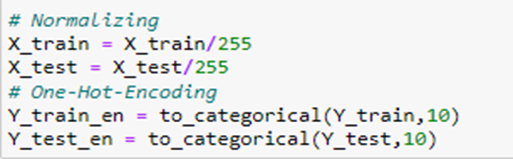


3.Building and Training the Model

We used three types of model here:

a.Model 1:
    Model building:
*   Convolution or Conv2D Layer: Filters used: 32, Kerenel:(3,3),          activation:'relu and softmax'
*   Dense Layer: 64 neuron and 10 neuron (10 neuron as output layer)
    Model Compilation:
*   Loss function: categorical_cross_entropy
*   Optimizer: Adam
*   Metrics: Accuracy
    Model Training:
*   epochs = 20
*   Validation_Split = 0.1
*   Verbose = 1

B.Model 2:
    Model building:
*   Convolution or Conv2D Layer: Filters used: 128, Kerenel:(4,4),          activation:'relu and softmax'
*   Dense Layer: 256 neuron and 10 neuron (10 neuron as output layer)
    Model Compilation:
*   Loss function: categorical_cross_entropy
*   Optimizer: Adam
*   Metrics: Accuracy
*   Dropout: 0.5
    Model Training:
*   epochs = 20
*   Validation_Split = 0.10
*   Verbose = 1

C.Model 3:
    Model building:
*   Convolution or Conv2D Layer: Filters used: 128, Kerenel:(4,4),          activation:'relu and softmax'
*   Dense Layer: 256 neuron and 10 neuron (10 neuron as output layer)
    Model Compilation:
*   Loss function: categorical_cross_entropy
*   Optimizer: Adam at Learning Rate 0.0001
*   Metrics: Accuracy
*   Dropout: 0.5
    Model Training:
*   epochs = 30
*   Validation_Split = 0.10
*   Verbose = 1

Conclusion: 

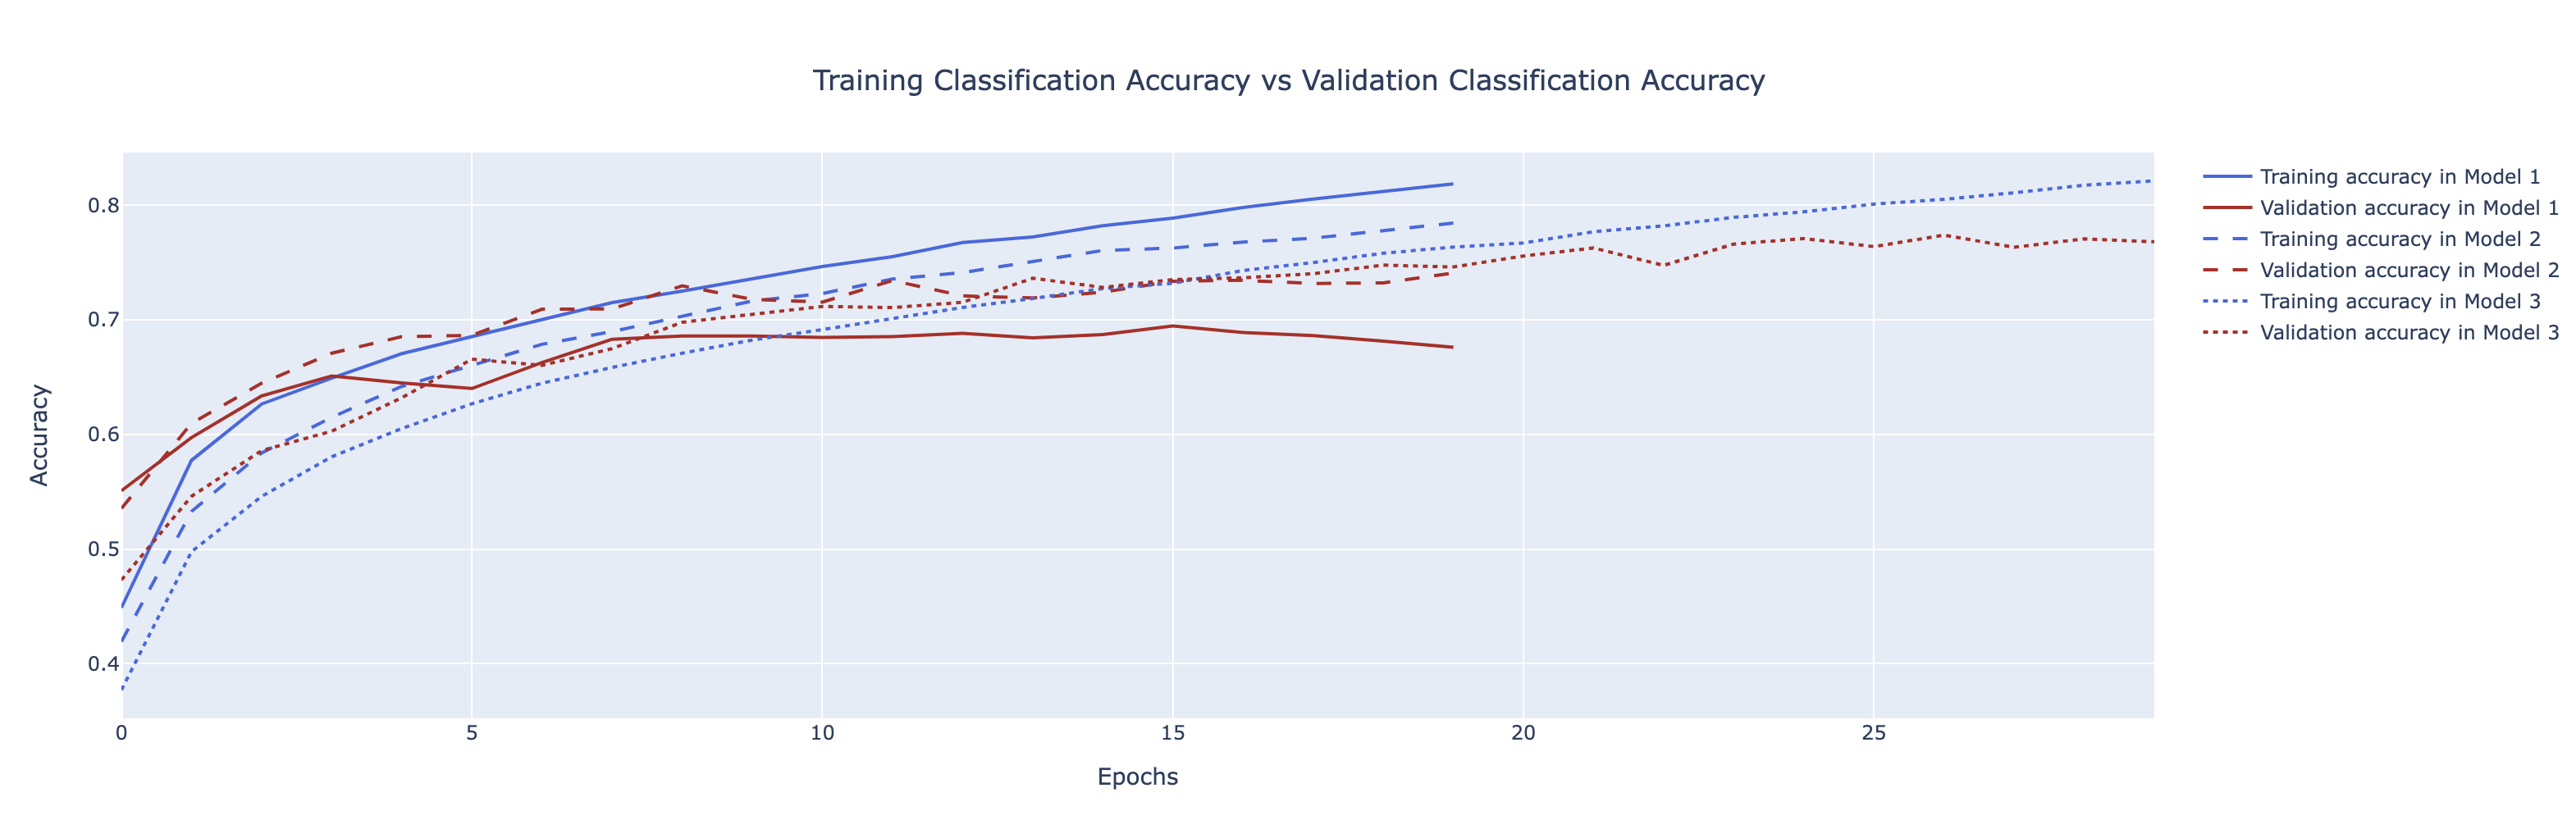

In the 1st Model, we used the filter size:32, Kernel:(3,3) and 64 Neurons in the hidden layer. In this model we got the highest accuracy of ~81% but due to validation loss, the validation accuracy is of 67%.

In the 2nd Model, we increase the filter size to 264, Kernal:(4,4) and we used dropout rate of 50%. We got the training accuracy of 78.43% but the difference is between the training and validation accuracy is decreased. Now the validation accuracy is 74.08%.

In the 3rd Model, we followed the same model as model 2 and increase the number of epochs to 30 and learning rate of 0.0001%. Now the accuray is reduded when compared to the previous models but the difference between the training and validation accuracy is reduced. Now the training accuracy is 82% and validation accuracy is 76%. This model is more stable when compared to earlier models.

As a final conclusion, model 3 is better.



*   Next, we tested model 3 with our test data sets and we got an accuracy of 75.3%. 

